In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

An example of a SimpleRNN layer used to return only the last timestep

In [2]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


An example of a SimpleRNN layer used to return the full state sequence

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. In such a setup, one will have to get all of the intermediate layers to return full sequence of outputs (except, perhaps, the last one):

In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
# Last layer only returns the last output
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [6]:
# Number of word to consider as features
max_features = 10000
# Cuts off texts after this many words (among 
# the max_features most common words)
maxlen = 500
batch_size = 32

In [8]:
print('Loading data...')
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=max_features)
print(len(train_data), 'train sequences')
print(len(test_data), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [9]:
print('Pad sequences of (samples x time)')
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)
print('train_data shape:', train_data.shape)
print('test_data shape:', test_data.shape)

Pad sequences of (samples x time)
train_data shape: (25000, 500)
test_data shape: (25000, 500)


In [10]:
from keras.layers import Dense

In [14]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(train_data, train_labels, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 32s - loss: 0.6060 - acc: 0.6671 - val_loss: 0.4507 - val_acc: 0.8268
Epoch 2/10
20000/20000 [==============================] - 29s - loss: 0.3934 - acc: 0.8389 - val_loss: 0.3658 - val_acc: 0.8514
Epoch 3/10
20000/20000 [==============================] - 29s - loss: 0.2884 - acc: 0.8882 - val_loss: 0.4635 - val_acc: 0.7858
Epoch 4/10
20000/20000 [==============================] - 30s - loss: 0.2351 - acc: 0.9099 - val_loss: 0.3477 - val_acc: 0.8614
Epoch 5/10
20000/20000 [==============================] - 29s - loss: 0.1881 - acc: 0.9309 - val_loss: 0.3587 - val_acc: 0.8624
Epoch 6/10
20000/20000 [==============================] - 28s - loss: 0.1429 - acc: 0.9493 - val_loss: 0.3706 - val_acc: 0.8612
Epoch 7/10
20000/20000 [==============================] - 28s - loss: 0.1022 - acc: 0.9659 - val_loss: 0.4531 - val_acc: 0.8306
Epoch 8/10
20000/20000 [==============================]

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
acc, val_acc, loss, val_loss = pd.Series(history.history)

In [17]:
epochs = range(1, len(acc) + 1)

In [18]:
%matplotlib inline

<Figure size 432x288 with 0 Axes>

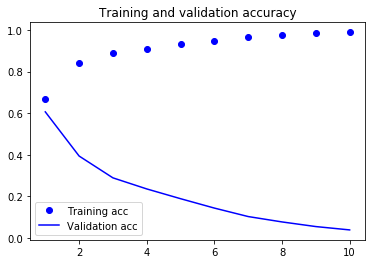

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

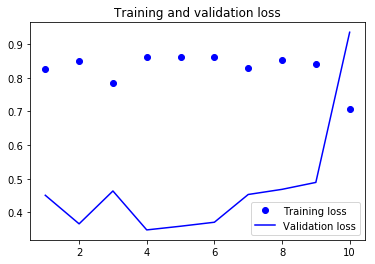

In [20]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
from keras.layers import LSTM

In [22]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(train_data, train_labels, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 133s - loss: 0.5117 - acc: 0.7573 - val_loss: 0.4118 - val_acc: 0.8374
Epoch 2/10
20000/20000 [==============================] - 125s - loss: 0.2913 - acc: 0.8877 - val_loss: 0.3143 - val_acc: 0.8844
Epoch 3/10
20000/20000 [==============================] - 124s - loss: 0.2349 - acc: 0.9122 - val_loss: 0.3709 - val_acc: 0.8352
Epoch 4/10
20000/20000 [==============================] - 124s - loss: 0.2010 - acc: 0.9257 - val_loss: 0.4884 - val_acc: 0.8532
Epoch 5/10
20000/20000 [==============================] - 123s - loss: 0.1802 - acc: 0.9348 - val_loss: 0.3665 - val_acc: 0.8694
Epoch 6/10
20000/20000 [==============================] - 125s - loss: 0.1591 - acc: 0.9433 - val_loss: 0.3056 - val_acc: 0.8866
Epoch 7/10
20000/20000 [==============================] - 124s - loss: 0.1509 - acc: 0.9466 - val_loss: 0.3249 - val_acc: 0.8748
Epoch 8/10
20000/20000 [========================

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
acc, val_acc, loss, val_loss = pd.Series(history.history)

In [25]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

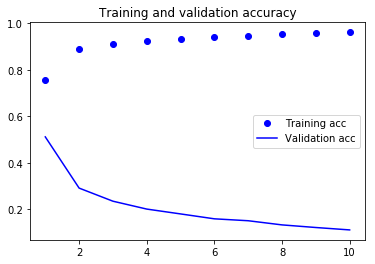

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

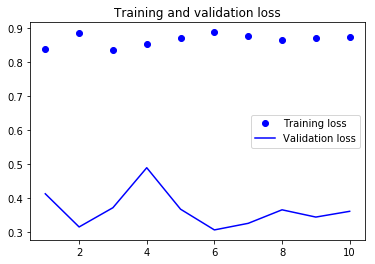

In [27]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 127s   


[0.4227464476442337, 0.85096]